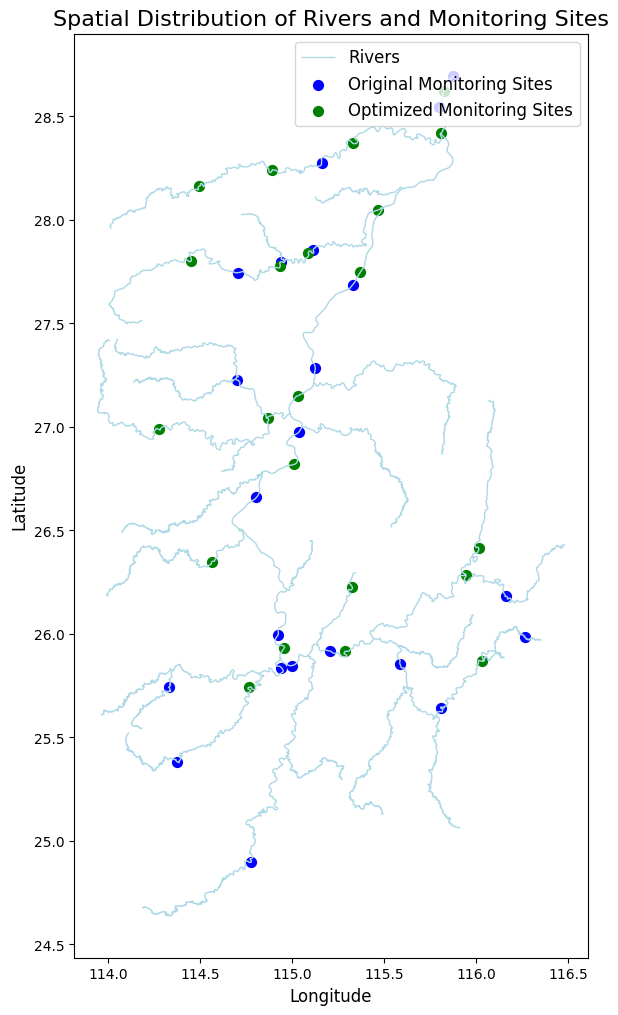

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取三个 shp 文件
optimized_gdf = gpd.read_file("../data/优化后的常规监测站点.shp")  # 优化后的常规监测断面
original_gdf = gpd.read_file("../data/常规监测断面.shp")  # 原常规监测断面
river_gdf = gpd.read_file("../data/最新赣江河流.shp")  # 河流

# 设置地图绘制
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# 绘制河流
river_gdf.plot(ax=ax, color="lightblue", linewidth=1, label="Rivers")

# 绘制原常规监测断面
original_gdf.plot(ax=ax, color="blue", label="Original Monitoring Sites", marker="o", markersize=50)

# 绘制优化后的常规监测断面
optimized_gdf.plot(ax=ax, color="green", label="Optimized Monitoring Sites", marker="o", markersize=50)

# 添加标题、图例和轴标签
plt.title("Spatial Distribution of Rivers and Monitoring Sites", fontsize=16)
plt.legend(loc="upper right", fontsize=12)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# 显示地图
plt.show()


找到 2 对距离小于5km的点位：

优化站点 292 与原始站点 浮桥 距离：2315.78米
优化站点 295 与原始站点 罗坊 距离：3355.77米


e:\Python\Anaconda\envs\shenduxuexi\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Python\Anaconda\envs\shenduxuexi\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Python\Anaconda\envs\shenduxuexi\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31449 (\N{CJK UNIFIED IDEOGRAPH-7AD9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Python\Anaconda\envs\shenduxuexi\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Python\Anaconda\envs\shenduxuexi\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) miss

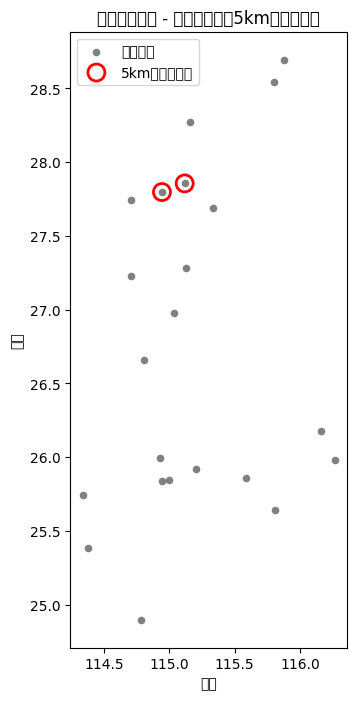

In [2]:
# 新增单元格 - 计算优化站点与原始站点间距离小于5km的点位（适配字段名）
# 步骤1：坐标系统转换（WGS84转UTM Zone 50N）
optimized_utm = optimized_gdf.to_crs(epsg=32650)
original_utm = original_gdf.to_crs(epsg=32650)

# 步骤2：创建交叉连接（注意字段名适配）
cross_join = optimized_utm.merge(
    original_utm, 
    how='cross', 
    suffixes=('_opt', '_ori')  # 自动添加后缀区分字段
)

# 步骤3：计算点对间距离（单位：米）
cross_join['distance_m'] = cross_join.apply(
    lambda row: row['geometry_opt'].distance(row['geometry_ori']), 
    axis=1
)

# 步骤4：筛选5km内的点对
close_pairs = cross_join[cross_join['distance_m'] < 5000]

# 步骤5：格式化输出结果（适配字段名）
print(f"找到 {len(close_pairs)} 对距离小于5km的点位：\n")
for idx, row in close_pairs.iterrows():
    print(f"优化站点 {row['point_id_opt']} 与原始站点 {row['断面名_ori']} 距离：{row['distance_m']:.2f}米")

# 可选：保存结果到CSV（适配字段名）
import os  # 新增导入

# 在保存CSV前添加目录创建逻辑
output_dir = '../output/'
# 创建输出目录（如果不存在）
os.makedirs(output_dir, exist_ok=True)  # 关键修复点

# 修改后的保存代码（添加路径存在性保障）
close_pairs[['point_id_opt', '断面名_ori', 'distance_m']].rename(
    columns={
        'point_id_opt': '优化站点ID',
        '断面名_ori': '原始断面名称',
        'distance_m': '距离(米)'
    }
).to_csv(os.path.join(output_dir, '5km内监测点对.csv'),  # 使用路径拼接
         index=False, 
         encoding='utf-8-sig')
# 新增单元格 - 在地图上用红色圆圈标记原始站点
import matplotlib.pyplot as plt

# 筛选出所有原始站点（去重）
original_sites = close_pairs[['断面名_ori', 'geometry_ori']].drop_duplicates()

# 转换回WGS84坐标系以匹配常见地图
original_sites_wgs84 = original_sites.set_geometry('geometry_ori').to_crs(epsg=4326)

# 创建地图画布
fig, ax = plt.subplots(figsize=(12, 8))

# 绘制所有原始站点（灰色底点）
original_gdf.to_crs(epsg=4326).plot(ax=ax, color='gray', markersize=20, label='原始站点')

# 高亮目标站点（红色圆圈）
original_sites_wgs84.plot(
    ax=ax, 
    marker='o', 
    markersize=150,  # 控制圆圈大小
    facecolor='none',  # 空心
    edgecolor='red', 
    linewidth=2, 
    label='5km内关联站点'
)

# 添加图例和标题
ax.legend()
plt.title("原始站点分布 - 红色圆圈标记5km内关联站点")
plt.xlabel("经度")
plt.ylabel("纬度")

# 显示地图
plt.show()




找到 5 对距离5-10km内的点位：

优化站点 368 与原始站点 峡山 距离：8524.15米
优化站点 374 与原始站点 新庙前 距离：7814.28米
优化站点 403 与原始站点 新干车头 距离：7655.98米
优化站点 416 与原始站点 生米 距离：9328.14米
优化站点 416 与原始站点 八一桥 距离：9198.00米


e:\Python\Anaconda\envs\shenduxuexi\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Python\Anaconda\envs\shenduxuexi\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Python\Anaconda\envs\shenduxuexi\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31449 (\N{CJK UNIFIED IDEOGRAPH-7AD9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Python\Anaconda\envs\shenduxuexi\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Python\Anaconda\envs\shenduxuexi\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) miss

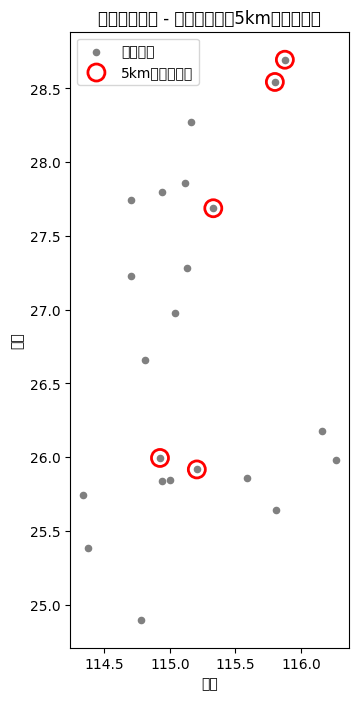

In [4]:
# 新增单元格 - 计算优化站点与原始站点间距离小于5km的点位（适配字段名）
# 步骤1：坐标系统转换（WGS84转UTM Zone 50N）
optimized_utm = optimized_gdf.to_crs(epsg=32650)
original_utm = original_gdf.to_crs(epsg=32650)

# 步骤2：创建交叉连接（注意字段名适配）
cross_join = optimized_utm.merge(
    original_utm, 
    how='cross', 
    suffixes=('_opt', '_ori')  # 自动添加后缀区分字段
)

# 步骤3：计算点对间距离（单位：米）
cross_join['distance_m'] = cross_join.apply(
    lambda row: row['geometry_opt'].distance(row['geometry_ori']), 
    axis=1
)

# 步骤4：筛选5-10km内的点对（开区间，不包含5km和10km）
close_pairs = cross_join[(cross_join['distance_m'] > 5000) & (cross_join['distance_m'] < 10000)]

# 步骤5：格式化输出结果（适配字段名）
print(f"找到 {len(close_pairs)} 对距离5-10km内的点位：\n")
for idx, row in close_pairs.iterrows():
    print(f"优化站点 {row['point_id_opt']} 与原始站点 {row['断面名_ori']} 距离：{row['distance_m']:.2f}米")

# 可选：保存结果到CSV（适配字段名）
import os  # 新增导入

# 在保存CSV前添加目录创建逻辑
output_dir = '../output/'
# 创建输出目录（如果不存在）
os.makedirs(output_dir, exist_ok=True)  # 关键修复点

# 修改后的保存代码（添加路径存在性保障）
close_pairs[['point_id_opt', '断面名_ori', 'distance_m']].rename(
    columns={
        'point_id_opt': '优化站点ID',
        '断面名_ori': '原始断面名称',
        'distance_m': '距离(米)'
    }
).to_csv(os.path.join(output_dir, '5km内监测点对.csv'),  # 使用路径拼接
         index=False, 
         encoding='utf-8-sig')
# 新增单元格 - 在地图上用红色圆圈标记原始站点
import matplotlib.pyplot as plt

# 筛选出所有原始站点（去重）
original_sites = close_pairs[['断面名_ori', 'geometry_ori']].drop_duplicates()

# 转换回WGS84坐标系以匹配常见地图
original_sites_wgs84 = original_sites.set_geometry('geometry_ori').to_crs(epsg=4326)

# 创建地图画布
fig, ax = plt.subplots(figsize=(12, 8))

# 绘制所有原始站点（灰色底点）
original_gdf.to_crs(epsg=4326).plot(ax=ax, color='gray', markersize=20, label='原始站点')

# 高亮目标站点（红色圆圈）
original_sites_wgs84.plot(
    ax=ax, 
    marker='o', 
    markersize=150,  # 控制圆圈大小
    facecolor='none',  # 空心
    edgecolor='red', 
    linewidth=2, 
    label='5km内关联站点'
)

# 添加图例和标题
ax.legend()
plt.title("原始站点分布 - 红色圆圈标记5km内关联站点")
plt.xlabel("经度")
plt.ylabel("纬度")

# 显示地图
plt.show()


